Car price prediction


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [9]:
data = pd.read_csv("car data.csv")

In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [13]:
data.duplicated().sum()

2

In [14]:
data.drop_duplicates(inplace=True)

<Axes: >

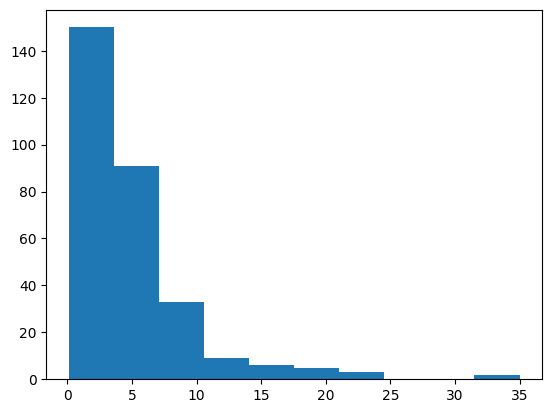

In [15]:
data.Selling_Price.hist(grid=False)

In [16]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [17]:
data['Year'].value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [18]:
data['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [19]:
data['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [20]:
data[['Year','Car_Name','Selling_Price','Present_Price']]

,Year,Car_Name,Selling_Price,Present_Price
0,2014,ritz,3.35,5.59
1,2013,sx4,4.75,9.54
2,2017,ciaz,7.25,9.85
3,2011,wagon r,2.85,4.15
4,2014,swift,4.60,6.87
...,...,...,...,...
296,2016,city,9.50,11.60
297,2015,brio,4.00,5.90
298,2009,city,3.35,11.00
299,2017,city,11.50,12.50


In [21]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [22]:
fuel_encoded = LabelEncoder()
data['Fuel_Type']=fuel_encoded.fit_transform(data['Fuel_Type'])

In [23]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,2,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,2,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [24]:
selling_encoded=LabelEncoder()
data['Selling_type'] = selling_encoded.fit_transform(data['Selling_type'])
selling_encoded.classes_

array(['Dealer', 'Individual'], dtype=object)

In [25]:

data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,2,0,Manual,0
298,city,2009,3.35,11.00,87934,2,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [26]:
transmission_encoded = LabelEncoder()
data['Transmission']=transmission_encoded.fit_transform(data['Transmission'])
transmission_encoded.classes_

array(['Automatic', 'Manual'], dtype=object)

In [27]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int32  
 6   Selling_type   299 non-null    int32  
 7   Transmission   299 non-null    int32  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 19.9+ KB


In [29]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
X = data.drop(columns=['Car_Name','Selling_Price'],axis=1)

In [31]:
y = data["Selling_Price"]

In [32]:
 X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [33]:
print(X.shape, y.shape)

(299, 7) (299,)


In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((224, 7), (75, 7), (224,), (75,))

In [36]:
model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [37]:
training_score = model.score(X_train, y_train)
print(f"The model's accuracy on the training dataset is: {training_score*100:.2f}%")

The model's accuracy on the training dataset is: 98.51%


In [39]:
y_preds = model.predict(X_train)
training_error = r2_score(y_train,y_preds)
print(f"The model's R-squared error score on the training dataset is: {training_score*100:.2f}%")

The model's R-squared error score on the training dataset is: 98.51%


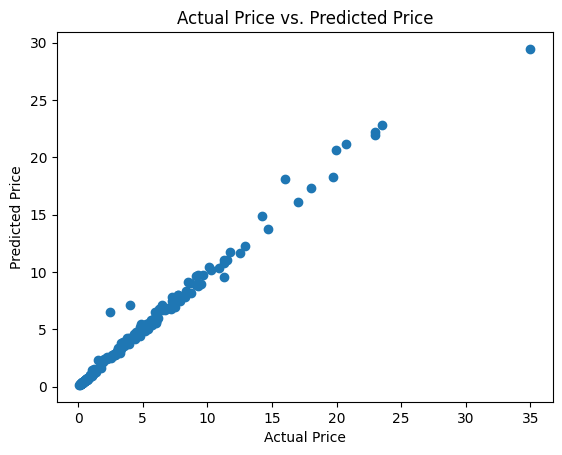

In [40]:
plt.scatter(y_train,y_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [41]:
test_preds = model.predict(X_test)
training_error = r2_score(y_test,test_preds)
print(f"The model's R-squared error score on the training dataset is: {training_score*100:.2f}%")

The model's R-squared error score on the training dataset is: 98.51%


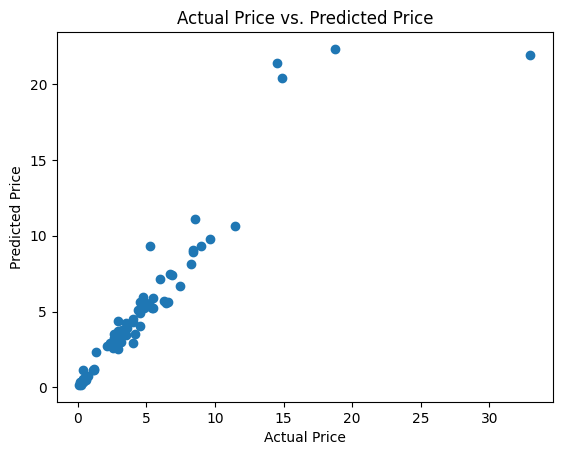

In [42]:
plt.scatter(y_test,test_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [44]:
np.random.seed(42)
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [45]:
training_score = model2.score(X_train, y_train)
print(f"The model's accuracy on the training dataset is: {training_score*100:.2f}%")

The model's accuracy on the training dataset is: 88.92%


In [46]:
y_preds = model2.predict(X_train)
training_error = r2_score(y_train,y_preds)
print(f"The model's R-squared error score on the training dataset is: {training_score*100:.2f}%")

The model's R-squared error score on the training dataset is: 88.92%


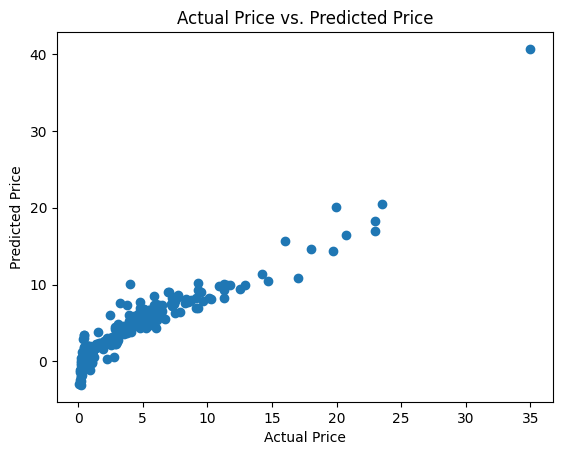

In [47]:
plt.scatter(y_train,y_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [48]:
test_preds = model2.predict(X_test)
training_error = r2_score(y_test,test_preds)
print(f"The model's R-squared error score on the training dataset is: {training_score*100:.2f}%")

The model's R-squared error score on the training dataset is: 88.92%


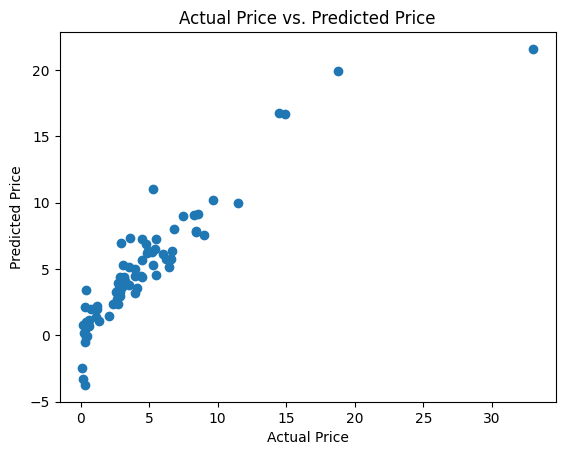

In [49]:
plt.scatter(y_test,test_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()